## 1- Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### tensorflow version

In [3]:
tf.__version__

'2.18.0'

## 2- Load Dataset

In [4]:
fmnist_data = keras.datasets.fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()

## 3- EDA

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

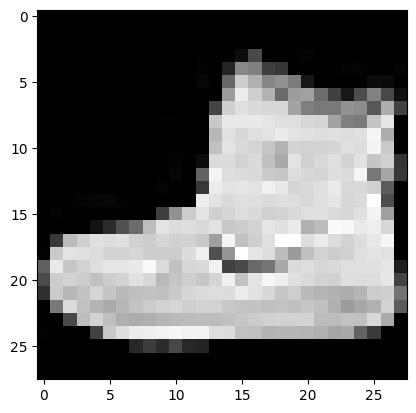

In [10]:
plt.imshow(x_train[0,], cmap="gray")

## 4- Normalization

In [11]:
x_train, x_test = x_train/255.0, x_test/255.0

In [12]:
# x_train[1,]
x_train.shape

(60000, 28, 28)

## 5- Squential Model

In [ ]:
model = keras.models.Sequential()

# Flatten Layer
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# The Hidden Layer
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(75, activation="relu"))


# The Output Layer
model.add(keras.layers.Dense(10, activation="softmax"))


# To avoid overfitting
model.add(keras.layers.Dropout(0.2))

c:\Users\Asus\ML-sandbox\mymlvenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## 6- Define Model

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
    keras.layers.Dropout(0.2)
])

In [36]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,835 (339.20 KB)

 Trainable params: 86,835 (339.20 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>,
 <Dropout name=dropout_1, built=True>]

## 7- Weights and Bias

In [38]:
weights, bias = model.layers[1].get_weights()

print(weights.shape)
print(bias.shape)

(784, 100)
(100,)


In [39]:
weights

array([[-0.01908186, -0.00763859,  0.05039212, ..., -0.04206113,
        -0.01083818, -0.00495676],
       [ 0.02786972, -0.03430368, -0.00127694, ..., -0.0194148 ,
        -0.02289317,  0.05040824],
       [-0.06680076,  0.00297926,  0.00188492, ...,  0.05089004,
         0.04711069, -0.02852645],
       ...,
       [-0.05050426,  0.08178629,  0.08097732, ...,  0.06946619,
        -0.01579046, -0.04820483],
       [-0.05251896, -0.07358633, -0.01356272, ...,  0.07402813,
        -0.07781339, -0.04871254],
       [ 0.0721876 ,  0.06230913, -0.00270002, ...,  0.06007665,
        -0.04896211, -0.04402633]], dtype=float32)

In [40]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

## 8- Compile Model

In [41]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]
              )

## 9- Fit Model

In [42]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    validation_split=0.15)

Epoch 1/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6073 - loss: 2.7922 - val_accuracy: 0.8281 - val_loss: 1.0149
Epoch 2/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6890 - loss: 1.9354 - val_accuracy: 0.8473 - val_loss: 0.9981
Epoch 3/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7022 - loss: 1.7928 - val_accuracy: 0.8567 - val_loss: 0.8748
Epoch 4/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7068 - loss: 1.6999 - val_accuracy: 0.8629 - val_loss: 0.8970
Epoch 5/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7052 - loss: 1.6598 - val_accuracy: 0.8672 - val_loss: 0.9912
Epoch 6/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7156 - loss: 1.5628 - val_accuracy: 0.8652 - val_loss: 0.7939
Epoch 7/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7220 - loss: 1.5441 - val_accuracy: 0.8736 - val_loss: 0.8077
Epoch 8/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7210 - loss: 1.5280 -

In [43]:
print(history.history)

{'accuracy': [0.6515490412712097, 0.691529393196106, 0.7030392289161682, 0.7053333520889282, 0.7094313502311707, 0.7141176462173462, 0.7206078171730042, 0.7220588326454163, 0.7202745079994202, 0.7211176753044128, 0.7254117727279663, 0.7284117937088013, 0.7282941341400146, 0.7306862473487854, 0.7337254881858826, 0.7349019646644592, 0.7351764440536499, 0.732764720916748, 0.7337254881858826, 0.7392941117286682, 0.74082350730896, 0.7387058734893799, 0.7403333187103271, 0.7400000095367432, 0.74311763048172, 0.744549036026001, 0.744705855846405, 0.7435294389724731, 0.7464313507080078, 0.7467058897018433, 0.7450196146965027, 0.7465097904205322, 0.7483725547790527, 0.7462157011032104, 0.7492548823356628, 0.7512549161911011, 0.747372567653656, 0.7509999871253967, 0.7498431205749512, 0.7509999871253967, 0.7537646889686584, 0.7521960735321045, 0.753686249256134, 0.754921555519104, 0.7523529529571533, 0.7542352676391602, 0.7559019327163696, 0.7556078433990479, 0.7585098147392273, 0.758686304092407

## 10- Plot

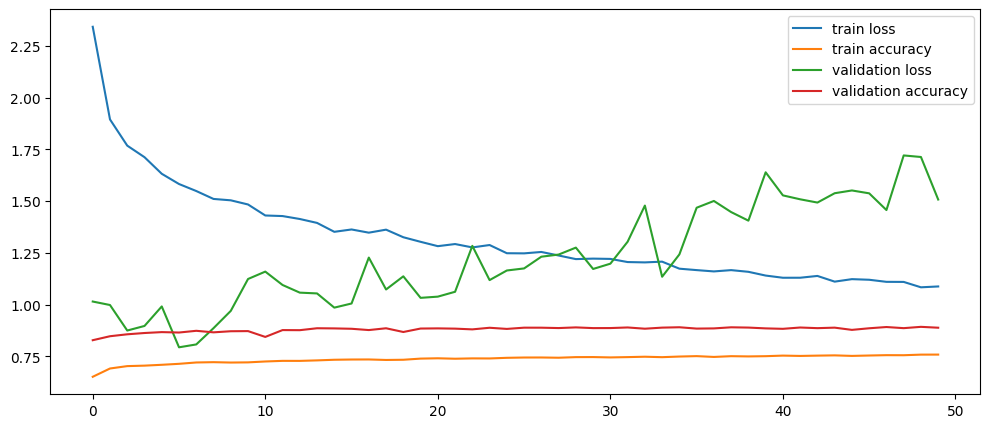

In [44]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["accuracy"], label="train accuracy")
ax.plot(history.history["val_loss"], label="validation loss")
ax.plot(history.history["val_accuracy"], label="validation accuracy")

ax.legend()

## 11- Evaluate Model

In [45]:
model.evaluate(x_test, y_test, verbose=0)

[1.6543134450912476, 0.8849999904632568]

## 12- Prediction

In [46]:
x3 = x_test[1:3,:,:]
x3.shape

(2, 28, 28)

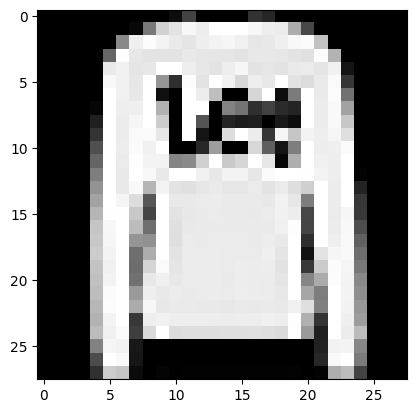

In [47]:
plt.imshow(x3[0], cmap="gray")

In [48]:
model.predict(x3).round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [49]:
model.predict(x3).shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


(2, 10)

In [50]:
np.argmax(model.predict(x3).round(3), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


array([2, 1])

In [51]:
y_test[1:3]

array([2, 1], dtype=uint8)